# ML Course 5-6 - Practice on logistic regression and classification assessment (solution)

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Preparation of the data set

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

**Loading the data set from Scikit-Learn**

In [23]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [24]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

**Getting a description of the data set**

In [25]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [26]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [27]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [28]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


In [29]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

**To make it easier to do visual check of the data, we remove the encoding**

In [30]:
target = target.replace({0:data_all.target_names[0], 1:data_all.target_names[1]})
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


## Subject

We have here a large data set that could help to predict if a tumor is benign or malignant based on its characteristics. In this work, we will focus on a small number of predictors that we will use to train and assess logistic regressions.

<font color=red><b>Questions in red have to be answered only after lecture session 7 (classification assessment).</font>

* We check at first if the tumor radius is a good predictor for breast cancer.
  * Make data exploration on mean radius, taking into account the target class attributions (examples: density plots or boxplots for each tumor type). Do you think it can make an good predictor?
  * Encode the target and plot it with respect to mean radius.
  * Do a train-test split and train a logistic regression.
  * On your latter plot, add the curve of the probability $P\left( Y=1 \left| X=x \right. \right)$. Here $Y$ is the tumor type and $x$ is the mean radius.
  * According to your model, what is the minimum value for mean radius for considering that the tumor is malignant? Compute prediction of class attribution (tumor type) for several values of mean radius to check your intuition.
  * <font color=red>Compute and display the confusion matrix. Compute the accuracy, precision and recall "by hand" from the confusion matrix.</font> 
  * <font color=red>Imagine that we want to make the diagnosis of breast cancer to be able to treat it if necessary. Should we better focus on increasing the recall or the precision of the prediction? And why? How can we adapt the sensibility of the prediction?</font> 
* We decide to add an extra predictor to our model. 
  * Inspect the data in order to tell —  between mean texture, mean perimeter, and mean area — which is the most relevant predictor to choose (in addition to mean radius).
  * Re-train your logistic regression with your two predictors (mean radius and the one you have picked).
  * <font color=red>How have the classification performances increased?</font> 
* Comparison of the two models: 
  * <font color=red>Plot the ROC curves of the two previous models and make the comparison.</font> 
  * <font color=red>Compute the LogLoss values of the two previous models and make the comparison.</font> 

# Solution

We check at first if the tumor radius is a good predictor for breast cancer.
* Make data exploration on mean radius, taking into account the target class attributions (examples: density plots or boxplots for each tumor type). Do you think it can make an good predictor?

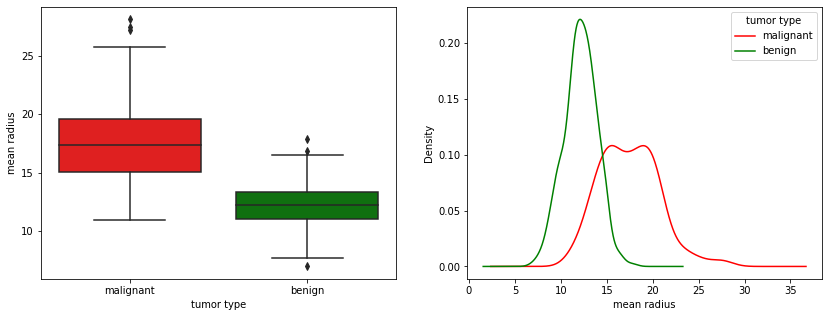

In [31]:
feature_name = 'mean radius'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plot boxplot on first figure
import seaborn as sns
sns.boxplot(x=target['tumor type'], y=feature_name, data=features, ax=axes[0], palette=['red', 'green'])

# Plot densities on second figure
for i, feature_value in enumerate(['malignant', 'benign']):
    (features[feature_name][target['tumor type']==feature_value]).plot(kind='density', c=['red', 'green'][i], label=feature_value, ax=axes[1])
axes[1].legend(title=target.columns.values[0])
axes[1].set_xlabel(feature_name)

plt.show()

The distribution of mean radius is clearly different for malignant and benign tumors so it seems that mean radius can be a good predictor.

* Encode the target and plot it with respect to mean radius.

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target.values.reshape(-1,))

In [33]:
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


In [34]:
pd.DataFrame(y).sample(n=8, random_state=1)

,0
421,0
47,1
292,0
186,1
414,1
132,1
161,1
197,1


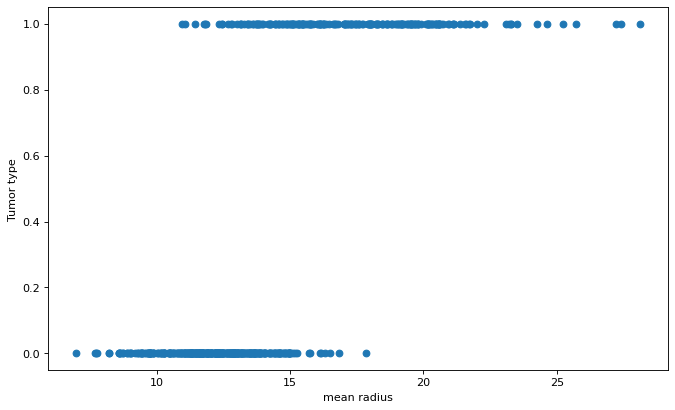

In [35]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(features[feature_name], y)
plt.xlabel(feature_name)
plt.ylabel("Tumor type")
plt.show()

* Do a train-test split and train a logistic regression.

**Train-test split:**

In [36]:
X = features['mean radius'].values.reshape(-1,1)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**Feature scaling:**

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training the logistic regression model**

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

* On your latter plot, add the curve of the probability $P\left( Y=1 \left| X=x \right. \right)$. Here $Y$ is the tumor type and $x$ is the mean radius.

In [40]:
# We define a set of x values
X_set = np.arange(0, 30, 0.1)
X_set = X_set.reshape(-1,1)
y_proba = log_reg.predict_proba(sc.transform(X_set))
y_score = y_proba[:,1]

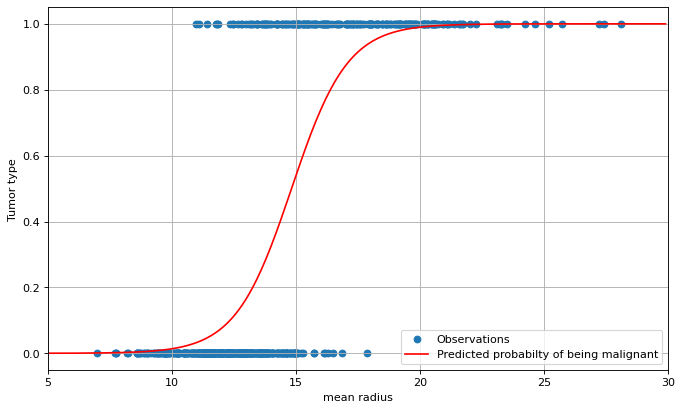

In [41]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(features[feature_name], y, label='Observations')
plt.plot(X_set, y_score, c='red', label='Predicted probabilty of being malignant')
plt.xlim([5, 30])
plt.xlabel(feature_name)
plt.ylabel("Tumor type")
plt.legend()
plt.grid()
plt.show()

* According to your model, what is the minimum value for mean radius for considering that the tumor is malignant? Compute prediction of class attribution (tumor type) for several values of mean radius to check your intuition.

On the graph above, we can see that the probability curve starts to be above 0.5 (i.e. prediction of malignant) for a value of mean radius between 14 and 15.

In [42]:
print(label_encoder.inverse_transform(log_reg.predict(sc.transform([[14]]))))

['benign']


In [43]:
print(label_encoder.inverse_transform(log_reg.predict(sc.transform([[15]]))))

['malignant']


* Compute and display the confusion matrix. Compute the accuracy, precision and recall "by hand" from the confusion matrix.

In [44]:
from sklearn.metrics import confusion_matrix
y_proba = log_reg.predict_proba(X_test)
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  6]
 [ 8 45]]


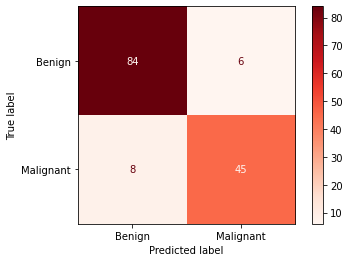

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay(cm, display_labels=["Benign", "Malignant"]).plot(cmap='Reds')

In [46]:
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
precision = cm[1, 1] / (cm[0, 1]  + cm[1, 1])
recall = cm[1, 1] / (cm[1, 0]  + cm[1, 1])
f1 = 2 * precision * recall / (precision + recall)

print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy,2)))
print('Precision (proportion of true malignant among tumor type prediction) is ' + str(round(precision,3)))
print('Recall (proportion of true malignant that are correctly predicted) is ' + str(round(recall,3)))
print('F1 score (combination of prediction and recall) is ' + str(round(f1, 3)))

Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true malignant among tumor type prediction) is 0.882
Recall (proportion of true malignant that are correctly predicted) is 0.849
F1 score (combination of prediction and recall) is 0.865


  * Imagine that we want to make the diagnosis of breast cancer to be able to treat it if necessary. Should we better focus on increasing the recall or the precision of the prediction? And why? How can we adapt the sensibility of the prediction?

For medical diagnosis, it is often prefered to have the lowest number of false negatives (i.e. non detections) because it could be dramatic for people suffering from cancer not to be detected on time. In that context, we will focus in the recall and try to make it high. One way of doing this is to lower the detection threshold. Smaller tumors will predict cancer and it will increase the recall (less false negatives). In parallel, there will be more false positives (i.e. false alarms) but with further medial test, we can check if the detection is confirmed or not.

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

threshold = 0.25
y_pred_lower = (log_reg.predict_proba(X_test) > threshold)[:,1] * 1

print(classification_report(y_test, y_pred_lower))
confmat = confusion_matrix(y_test, y_pred_lower)
_ = ConfusionMatrixDisplay(confmat, display_labels=label_encoder.classes_).plot()

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        90
           1       0.76      0.94      0.84        53

    accuracy                           0.87       143
   macro avg       0.86      0.88      0.86       143
weighted avg       0.89      0.87      0.87       143



We decide to add an extra predictor to our model. 

  * Inspect the data in order to tell —  between mean texture, mean perimeter, and mean area — which is the most relevant predictor to choose (in addition to mean radius).

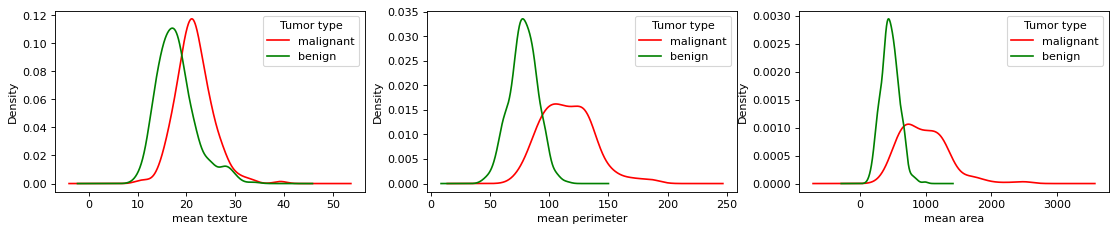

In [48]:
feature_list = ['mean texture', 'mean perimeter', 'mean area']

fig, axs = plt.subplots(1,len(feature_list), figsize=(17,3), dpi= 80)

for i_feature, feature in enumerate(feature_list):
    
    for i_tumor_type, tumor_type in enumerate(['malignant', 'benign']):
        features[feature][target['tumor type']==tumor_type].plot(kind='density', label=tumor_type, c=['red', 'green'][i_tumor_type], ax=axs[i_feature])
    
    axs[i_feature].set_xlabel(feature_list[i_feature])
    axs[i_feature].legend(title='Tumor type')
    
plt.show()   

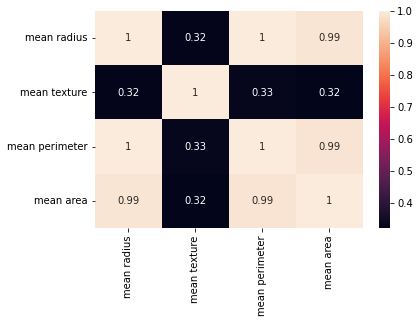

In [49]:
import seaborn as sns
correlation = features[['mean radius', 'mean texture', 'mean perimeter', 'mean area']].corr()
sns.heatmap(correlation, annot=True)
plt.show()

In [50]:
correlation['mean radius'][feature_list]

mean texture      0.323782
mean perimeter    0.997855
mean area         0.987357
Name: mean radius, dtype: float64

All three features are correlated with the target, so they could all be of interest. 
When we check the correlation with the predictor that is already in the model, we can tell that mean perimeter and mean area are highly correlated with mean radius, so probably they would not bring additional information the model. Mean texture seems not very correlated with mean radius, so probably it is the best predictor to add in order to improve the accuracy of the model.

  * Re-train your logistic regression with your two predictors (mean radius and the one you have picked).

In [51]:
X = features[['mean radius', 'mean texture']]

# Test-train split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Scaling
sc_2 = StandardScaler()
X_train_2 = sc_2.fit_transform(X_train_2)
X_test_2 = sc_2.transform(X_test_2)

# Training 
classifier_2 = LogisticRegression()
classifier_2.fit(X_train_2, y_train_2)

LogisticRegression()

  * How have the classification performances increased?

In [52]:
# Proba and prediction
y_proba_2 = classifier_2.predict_proba(X_test_2)
y_pred_2 = classifier_2.predict(X_test_2)

# Confusion matrix
cm_2 = confusion_matrix(y_test, y_pred_2)

# Performances
accuracy_2 = (cm_2[0, 0] + cm_2[1, 1]) / cm_2.sum()
precision_2 = cm_2[1, 1] / (cm_2[0, 1]  + cm_2[1, 1])
recall_2 = cm_2[1, 1] / (cm_2[1, 0]  + cm_2[1, 1])
f1_2 = 2 * precision * recall / (precision + recall)

print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_2,2)))
print('Precision (proportion of true malignant among tumor type prediction) is ' + str(round(precision_2,2)))
print('Recall (proportion of true malignant that are correctly predicted) is ' + str(round(recall_2,2)))
print('F1 score (combination of prediction and recall) is ' + str(round(f1_2, 3)))

Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true malignant among tumor type prediction) is 0.87
Recall (proportion of true malignant that are correctly predicted) is 0.87
F1 score (combination of prediction and recall) is 0.865


The recall has slightly increased from 0.85 to 0.87.

  * Plot the ROC curves of the two previous models and make the comparison.

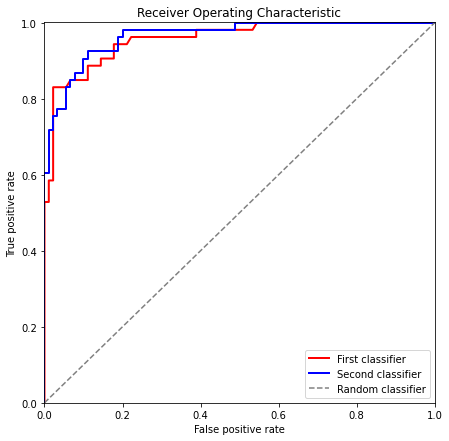

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score = y_proba[:,1]
y_score_2 = y_proba_2[:,1]

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic')
# Plot ROC curve for first classifier
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
plt.plot(false_positive_rate, true_positive_rate, c='red', linewidth=2, label='First classifier')
# Plot ROC curve for second classifier
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score_2)
plt.plot(false_positive_rate, true_positive_rate, c='blue', linewidth=2, label='Second classifier')
# Plot ROC curve for a random classifier
plt.plot([0, 1], ls='--', c='grey', label='Random classifier')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

The two classifiers are very similar. Though, the second classifier is slightly better for most threshold values.

  * Compute the LogLoss values of the two previous models and make the comparison.

Let's first compute it by hand:

In [54]:
logLoss = 0
logLoss_2 = 0

for i in range(len(y_score)):
    logLoss -= (y_test[i] * np.log(y_score[i]) + (1 - y_test[i]) * np.log((1 - y_score[i]))) / len(y_score)
    logLoss_2 -= (y_test[i] * np.log(y_score_2[i]) + (1 - y_test[i]) * np.log((1 - y_score_2[i]))) / len(y_score_2)

print('logLoss of first classifier is ' + str(logLoss))
print('logLoss of second classifier is ' + str(logLoss_2))

logLoss of first classifier is 0.2615755870539915
logLoss of second classifier is 0.23166475396532973


We can use the log_loss function to check:

In [55]:
from sklearn.metrics import log_loss

print(log_loss(y_test, y_score))
print(log_loss(y_test, y_score_2))

0.26157558705399137
0.23166475396532962


The second classifier has a lower logLoss than the first one, i.e. better performance.